## EDA of historical citibike ride data.
Data has been read into a sqlite3 database already.

## Some questions/figures to look at:
- Rides per year - is there a long-term trend 
- Rides per month
- Rides per day
- Rides per hour
- Rides per day of week
- Rides per station
- # stations vs time

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
con = sqlite3.connect("data/citibike_database.db3")

First i'll examine the number of rides per month, for 2014. The plot below shows that there is a strong seasonal cycle, with more rides in the summer months. My hypothesis is that this is mainly driven by the temperature; I will get weather data later and test this.


In [2]:
# rides per year - is there a trend in ridership?
df = pd.read_sql_query("select year,count(*) as num_rides from rides group by ?",con)
df

,year,num_rides
0,2016,32879902


In [ ]:
# look at # distinct stations over time?


In [5]:
# count rides per month for one year
year = 2015
df = pd.read_sql_query("SELECT year,month,count(*) as num_rides FROM rides WHERE year=? GROUP BY month", con,params=[year])
df

,year,month,num_rides
0,2015,1,285552
1,2015,2,196930
2,2015,3,341826
3,2015,4,652390
4,2015,5,961986
5,2015,6,941219
6,2015,7,1085676
7,2015,8,1179044
8,2015,9,1289699
9,2015,10,1212277


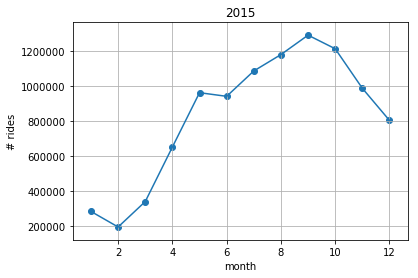

In [7]:
# Plot rides vs month
# There is a very strong seasonal cycle
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df.month,df.num_rides)
plt.scatter(df.month,df.num_rides)
plt.grid()
plt.xlabel('month')
plt.ylabel('# rides')
plt.title(str(year))

Next i'll look at the number of rides each day in 2014. This shows that there is a strong seasonal pattern, but also some big residuals from that pattern. These could be days that were unseasonably cold/warm, or due to other factors. 

In [10]:
# plot rides/day for one year
year=2015
df = pd.read_sql_query("select yday, count(*) as num_rides from rides where year=? group by yday",con,params=[year])

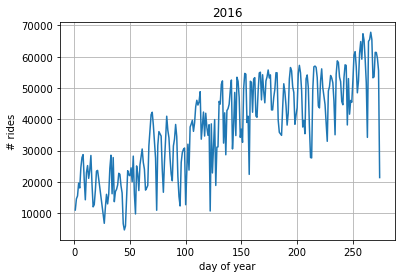

In [9]:
plt.plot(df.yday,df.num_rides)
plt.grid()
plt.xlabel('day of year')
plt.ylabel('# rides')
plt.title(str(year))

Next look at # rides by hour. There are two peaks - near 7-8am, and 17-18 pm, which probably correspond to people commuting during rush hour.

In [23]:
year = 2014
df_hr = pd.read_sql_query("select hour,count(*) as num_rides from rides where year=? group by hour",con,params=[year])

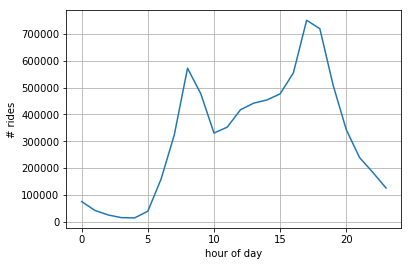

In [24]:
plt.plot(df_hr.hour,df_hr.num_rides)
plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
#plt.title('2014')

Next I look at rides vs day of week. 0 is Monday, 6 is Sunday. 
- There are significanlty less rides on the weekend. 
- Tuesday seems to have the most rides.

In [25]:
year = 2016
df_wkday = pd.read_sql_query("select year,wkday,count(*) as num_rides from rides where year=? group by wkday",con,params=[year])
#df_wkday = pd.read_sql_query("select year,wkday,count(*) as num_rides from rides group by year,wkday",con)
df_wkday

,year,wkday,num_rides
0,2016,0,1416601
1,2016,1,1572941
2,2016,2,1662608
3,2016,3,1669869
4,2016,4,1527452
5,2016,5,1244404
6,2016,6,1168774


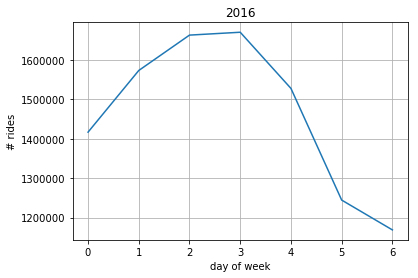

In [26]:
plt.plot(df_wkday.wkday,df_wkday.num_rides)
plt.grid()
plt.xlabel('day of week')
plt.ylabel('# rides')
plt.title(str(year))

In [42]:
# Rides per station
df = pd.read_sql_query("SELECT start_station_id, count(*) as num_rides FROM rides GROUP BY start_station_id ORDER BY num_rides DESC",con)

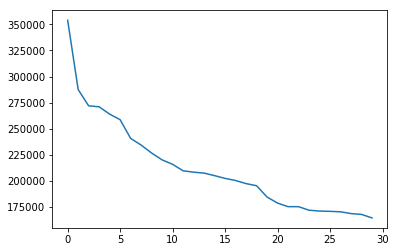

In [39]:
plt.plot(df.num_rides)

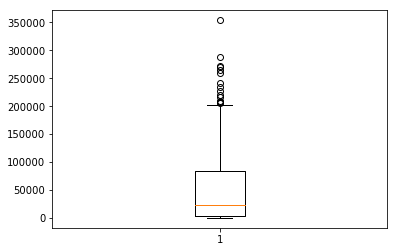

In [43]:
plt.boxplot(df.num_rides);

In [ ]:
plt.hist()

In [13]:

con.close()

In [ ]:
df = pd.read_sql_query("select start_station_id, start_station_name, count(*) as num_rides from rides where year=2014 group by start_station_id order by num_rides desc",con)

To-do:
- fit seasonal cycle and remove to examine anomalies
